### Probna ANN za PICOSEC-MM

In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import IPython

In [2]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (64,)),
    tf.keras.layers.Dense(units = 4),
    tf.keras.layers.Dense(units = 1),
])
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'mean_squared_error', )

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Run353

Priprema dataseta i treniranje modela:

In [4]:
datasetPath = IPython.extract_module_locals()[1]["__vsc_ipynb_file__"][:-13] + '\datasets\compiled\Run353\\1.1.2'
datasetBuilder = tfds.builder_from_directory(datasetPath)
trainingDataset = datasetBuilder.as_dataset(split = 'train[:80%]')
testingDataset = datasetBuilder.as_dataset(split = 'train[80%:90%]')

In [5]:
training_signalData = []
training_timeLabel = []
for event in trainingDataset:
    training_signalData.append(event['signal_data'])
    training_timeLabel.append(event['time_label'])
training_signalData = np.array(training_signalData)
training_timeLabel = np.array(training_timeLabel)

testing_signalData = []
testing_timeLabel = []
for event in testingDataset:
    testing_signalData.append(event['signal_data'])
    testing_timeLabel.append(event['time_label'])
testing_signalData = np.array(testing_signalData)
testing_timeLabel = np.array(testing_timeLabel)

In [6]:
model.fit(training_signalData, training_timeLabel, epochs = 5)

Epoch 1/5
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1711
Epoch 2/5
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028
Epoch 3/5
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028
Epoch 4/5
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027
Epoch 5/5
779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027


779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


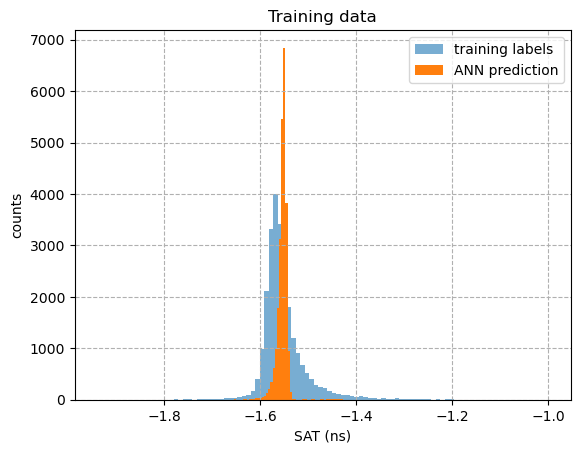

In [7]:
resultTraining = model.predict(training_signalData)
plt.hist(training_timeLabel, bins = 100, alpha = 0.6, label = 'training labels')
plt.hist(resultTraining, bins = 100, label = 'ANN prediction')
plt.ylabel('counts')
plt.xlabel('SAT (ns)')
plt.title('Training data')
plt.grid(ls = '--')
plt.legend();

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


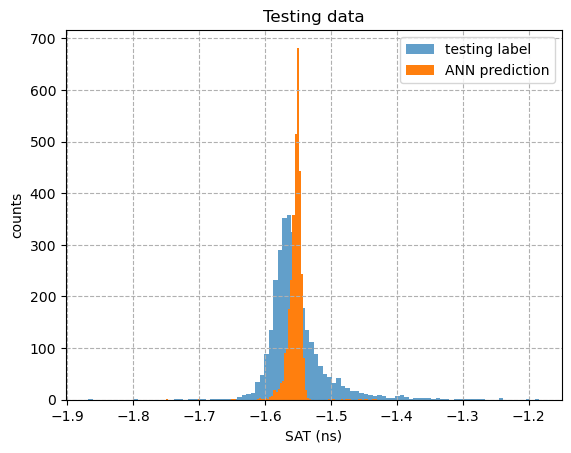

In [8]:
resultTesting = model.predict(testing_signalData)
plt.hist(testing_timeLabel, bins = 100, alpha = 0.7, label = 'testing label')
plt.hist(resultTesting, bins = 100, label = 'ANN prediction')
plt.legend()
plt.ylabel('counts')
plt.xlabel('SAT (ns)')
plt.grid(ls = '--')
plt.title('Testing data');

In [9]:
predictionError = np.array([resultTesting[i] - testing_timeLabel[i] for i in range(len(testing_timeLabel))])

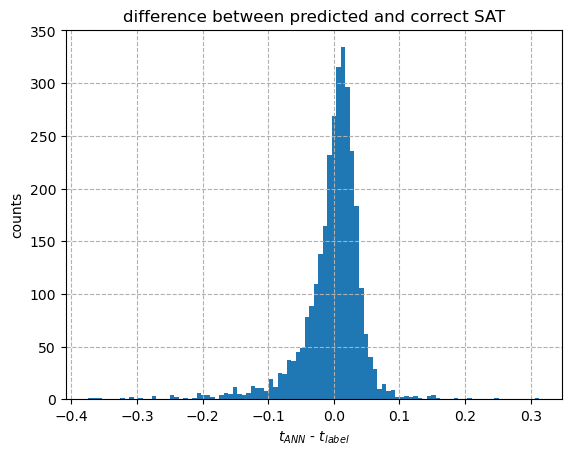

In [10]:
plt.hist(predictionError, bins = 100)
plt.ylabel('counts')
plt.xlabel(r'$t_{ANN}$ - $t_{label}$')
plt.grid(ls = '--')
plt.title('difference between predicted and correct SAT');